<a href="https://colab.research.google.com/github/remre/StriveSchool-ai/blob/main/week5featureeng/day9timeseries/parkinsonStrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from sklearn.pipeline import Pipeline    
import glob
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

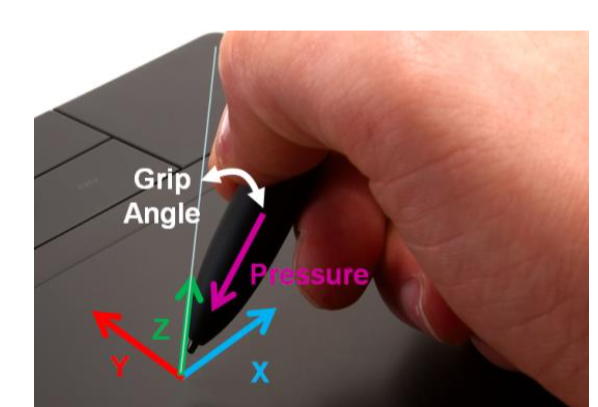

In [ ]:
dirpath = '/content/drive/MyDrive/dataAI/parkinsonchallenge/parkinson'
output = '/content/drive/MyDrive/dataAI/htrain.csv'
ooutput = '/content/drive/MyDrive/dataAI/ptrain.csv'
ooutputt =  '/content/drive/MyDrive/dataAI/atrain.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
csvout_lst = []
csvout_lsst = []
files = [os.path.join(dirpath, fname) for fname in os.listdir(dirpath)]

for filename in sorted(files):
  if filename.split('/')[7][0] == 'H':#seperate H 

    dataa = pd.read_csv(filename, sep=';', index_col=0, header=None,names = ['X', 'Y', 'Z', 'Pressure', 'GripAngle', 'Timestamp', 'Test_ID','Health Condition'])
    csvout_lst.append(dataa)  
    pd.concat(csvout_lst).to_csv(output)
  else:
    dataa = pd.read_csv(filename, sep=';', index_col=0, header=None,names = ['X', 'Y', 'Z', 'Pressure', 'GripAngle', 'Timestamp', 'Test_ID','Health Condition'])
    csvout_lsst.append(dataa)
    pd.concat(csvout_lsst).to_csv(ooutput)

dfp = pd.read_csv('/content/drive/MyDrive/dataAI/ptrain.csv')
dfh = pd.read_csv('/content/drive/MyDrive/dataAI/htrain.csv')
dfh['Health Condition'] = pd.Series([0 for x in range(len(dfh.index))])#Healty ones get 0 
dfp['Health Condition'] = pd.Series([1 for x in range(len(dfp.index))])#disaster ones get 1
frame = [dfp,dfh]
pd.concat(frame).to_csv(ooutputt)# this is 

In [3]:
dfa = pd.read_csv('/content/drive/MyDrive/dataAI/atrain.csv')
dfa

,Unnamed: 0,X,Y,Z,Pressure,GripAngle,Timestamp,Test_ID,Health Condition
0,0,213,205,0,15,1440,1351716,0,1
1,1,213,205,0,47,1440,1351725,0,1
2,2,213,205,0,68,1440,1351734,0,1
3,3,213,205,0,84,1420,1351743,0,1
4,4,214,205,0,88,1440,1351752,0,1
...,...,...,...,...,...,...,...,...,...
404428,201769,377,297,714,0,1240,1374850038,2,0
404429,201770,381,298,754,0,1290,1374850045,2,0
404430,201771,381,299,778,0,1380,1374850052,2,0
404431,201772,387,300,818,0,1430,1374850059,2,0


In [ ]:
dirpatht = '/content/drive/MyDrive/dataAI/parkinsonchallenge/control'
outputt = '/content/drive/MyDrive/dataAI/test.csv'

In [ ]:
pd.concat(
    pd.read_csv(os.path.join(dirpatht, fname), sep=';', index_col=0, header=None,names = ['X', 'Y', 'Z', 'Pressure', 'GripAngle', 'Timestamp', 'Test_ID','Health Condition'])
    for fname in sorted(os.listdir(dirpatht))).to_csv(outputt)

In [ ]:
df_cont = pd.read_csv('/content/drive/MyDrive/dataAI/test.csv')
df_cont

In [6]:
dfa = dfa.drop(['Unnamed: 0','Timestamp'],1)

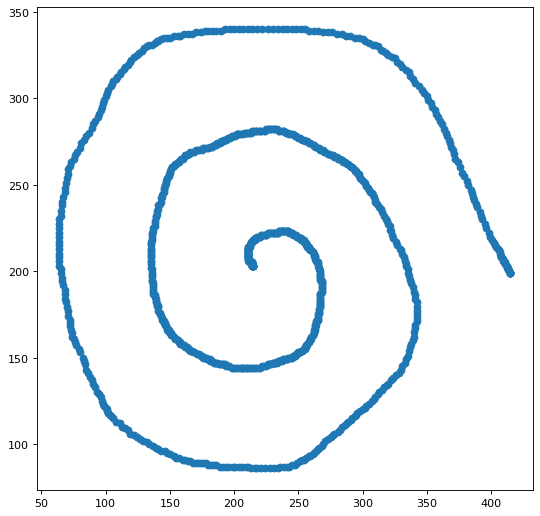

In [7]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(dfa['X'][:979],dfa['Y'][:979])

In [ ]:
k = [] #try to find the first row of each patient
for i in range(1,len(dfa)-1):
  if dfa['X'][i+1] - dfa['X'][i] >25:
    k.append(dfa['X'][:i].sum())

In [ ]:
[k.append(dfa['X'][:i].sum()) if (dfa['X'][i+1] - dfa['X'][i]) > 25 for i in range(1,len(dfa)-1)]

In [ ]:
k

In [ ]:
   X, y = dfa.iloc[:,:-1], dfa.iloc[:,6]

In [ ]:
print(dfa)

          X    Y    Z  Pressure  GripAngle  Test_ID  Health Condition
0       213  205    0        15       1440        0                 1
1       213  205    0        47       1440        0                 1
2       213  205    0        68       1440        0                 1
3       213  205    0        84       1420        0                 1
4       214  205    0        88       1440        0                 1
...     ...  ...  ...       ...        ...      ...               ...
404428  377  297  714         0       1240        2                 0
404429  381  298  754         0       1290        2                 0
404430  381  299  778         0       1380        2                 0
404431  387  300  818         0       1430        2                 0
404432  387  300  818         0       1430        2                 0

[404433 rows x 7 columns]


In [ ]:
X.shape

(404433, 6)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.25)

In [ ]:
pipe_LogReg = Pipeline([('scaler',StandardScaler()),
                        ('LogisticRegression',LogisticRegression())])

pipe_knn = Pipeline([('scaler',StandardScaler()),
                        ('KNeighborsClassifier',KNeighborsClassifier())])

pipe_GBM = Pipeline([('scaler',StandardScaler()),
                        ("GBM", GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),)])

pipe_RForest = Pipeline([('scaler',StandardScaler()),
                  ('RandomForestClassifier',RandomForestClassifier())])


pipe_Ada = Pipeline([('scaler',StandardScaler()),
                  ('AdaBoostClassifier',AdaBoostClassifier())])

In [ ]:
pipelines = [pipe_LogReg ,pipe_knn,pipe_GBM,pipe_RForest,pipe_Ada]

In [ ]:
for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [ ]:
model_name =[]
scores=[]
#the approach is false obviously
for i,modell in enumerate(pipelines):
    pred = modell.predict(X_test)
    score = accuracy_score(y_test,pred)
    model_name.append(modell.steps[1][0])
    scores.append(score)
    print(i,modell.steps[1][0].capitalize(),':',score)
    print('\n')

0 Logisticregression : 0.6449178609223709


1 Kneighborsclassifier : 0.9939669070013549


2 Gbm : 0.8448407164545194


3 Randomforestclassifier : 0.9968845503367653


4 Adaboostclassifier : 0.8372548437824526




In [ ]:
confusion_matrix(y_test, pred
                 )

array([[39473, 10971],
       [ 5484, 45181]])